In [13]:
#Importation des bibliotheques
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [4]:
# On importe le dataset
dataset = pd.read_csv("creditcard.csv")

In [6]:
#on affiche les 10 premieres lignes histoire de voir comment se presente les donnees
dataset.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [7]:
#Voir les informations sur le dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
#recherche de colone ayant des valeurs null
dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
#Nombre de transaction frauduleuse et non frauduleuse de notre dataset
dataset['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [10]:
# On sépare notre dataframe en deux les inputs et les targets
X = dataset.drop('Class',axis='columns')
Y = dataset.Class

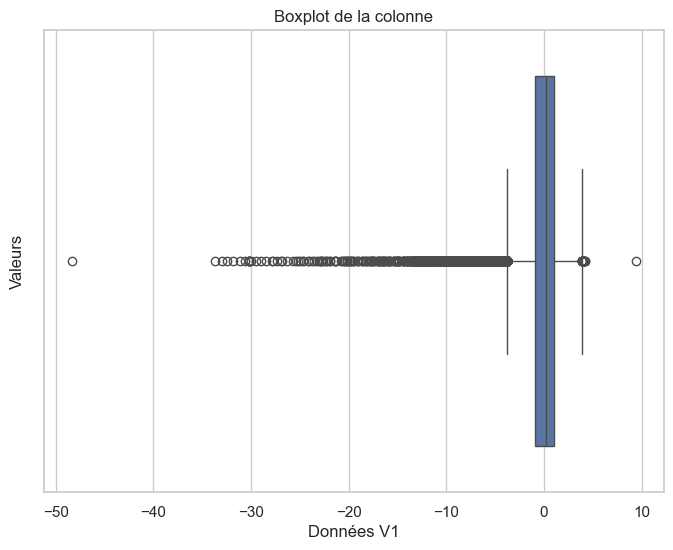

In [18]:
#Boxplot pour voir les valeurs abérrantes,
sns.set(style="whitegrid") 

plt.figure(figsize=(8, 6)) 

sns.boxplot(x='V3', data=X)  #on changera les colones a chaque fois pour voir sil ya des valeurs aberrantes

plt.title("Boxplot de la colonne")
plt.xlabel("Données V1")
plt.ylabel("Valeurs")
plt.show()

In [19]:
#on procède à une séparation de données test et train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [21]:
#afficher les dimenssions des données train
print(X.shape,X_train.shape, X_test.shape)

(284807, 30) (227845, 30) (56962, 30)


In [25]:
#choix du model d'entrainement
model = LogisticRegression(max_iter=1000)

In [26]:
#entrainement des données au model choisi
model.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

In [29]:
#evaluation du model avec les données d'entrainements
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [30]:
print(training_data_accuracy)

0.9991222102745287


In [31]:
#evaluation du model avec les données test
X_test_prediction = model.predict(X_test)
training_data_accuracy_test = accuracy_score(X_test_prediction,Y_test)

In [32]:
print(training_data_accuracy_test)

0.9993153330290369


interpretation

Le fait que l'exactitude sur l'ensemble de test soit légèrement plus élevée que sur l'ensemble d'entraînement suggère que le modèle généralise bien sur de nouvelles données. C'est un bon signe car cela indique que votre modèle n'a pas surajusté les données d'entraînement et est capable de bien performer sur des données non vues


Une exactitude de plus de 99% sur les deux ensembles de données est généralement considérée comme très bonne. Cela indique que le modèle est capable de prédire correctement la classe de la grande majorité des exemples dans les ensembles d'entraînement et de test

Les performances élevées sur les deux ensembles de données suggèrent que le modèle est robuste et fiable. Cela signifie qu'il est capable de maintenir de bonnes performances même sur des données différentes de celles sur lesquelles il a été entraîné